In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

def load_and_preprocess_data(filepath: str) -> pd.DataFrame:
    """
    Load and preprocess the fire data.
    """
    df = pd.read_csv(filepath)
    df['month'] = df['DOB'].apply(lambda x: int(x/30) + 1)
    return df


In [3]:
def plot_seasonal_patterns(df: pd.DataFrame):
    """
    Create visualization for seasonal fire patterns.
    """
    # Calculate monthly statistics
    monthly_stats = df.groupby('month').agg({
        'firearea': 'mean',
        'ID': 'count'
    }).reset_index()
    monthly_stats.columns = ['month', 'avg_area', 'count']
    
    # Create figure
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Plot bars for average area
    bars = ax1.bar(monthly_stats['month'], monthly_stats['avg_area'], 
                  color='indianred', alpha=0.6)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Fire Area (ha)', color='indianred')
    ax1.tick_params(axis='y', labelcolor='indianred')
    
    # Plot line for fire count
    line = ax2.plot(monthly_stats['month'], monthly_stats['count'], 
                   color='darkblue', linewidth=2, marker='o')
    ax2.set_ylabel('Number of Fires', color='darkblue')
    ax2.tick_params(axis='y', labelcolor='darkblue')
    
    plt.title('Seasonal Fire Patterns', pad=20)
    plt.grid(True, alpha=0.3)
    plt.show()


In [4]:
def plot_fire_progression(df: pd.DataFrame):
    """
    Create visualization for fire progression over first 30 days.
    """
    # Calculate daily averages
    progression = df[df['fireday'] <= 30].groupby('fireday').agg({
        'firearea': 'mean',
        'sprdistm': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Plot area progression
    ax1.plot(progression['fireday'], progression['firearea'], 
            color='firebrick', linewidth=2, label='Area')
    ax1.set_xlabel('Days Since Ignition')
    ax1.set_ylabel('Average Daily Area (ha)', color='firebrick')
    ax1.tick_params(axis='y', labelcolor='firebrick')
    
    # Plot spread distance
    ax2.plot(progression['fireday'], progression['sprdistm'], 
            color='darkred', linewidth=2, linestyle='--', label='Spread')
    ax2.set_ylabel('Average Daily Spread (m)', color='darkred')
    ax2.tick_params(axis='y', labelcolor='darkred')
    
    plt.title('Fire Progression Over First 30 Days', pad=20)
    plt.grid(True, alpha=0.3)
    plt.show()


In [5]:

def plot_elevation_impact(df: pd.DataFrame):
    """
    Create visualization for elevation impact on fire behavior.
    """
    # Create elevation bins
    df['elevation_bin'] = pd.cut(df['dem'], 
                                bins=10, 
                                labels=False)
    
    # Calculate statistics by elevation
    elevation_stats = df.groupby('elevation_bin').agg({
        'dem': 'mean',
        'firearea': 'mean',
        'slope': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Plot fire area by elevation
    line1 = ax1.plot(elevation_stats['dem'], elevation_stats['firearea'], 
                    color='darkred', linewidth=2, marker='o')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Average Fire Area (ha)', color='darkred')
    ax1.tick_params(axis='y', labelcolor='darkred')
    
    # Plot slope
    line2 = ax2.plot(elevation_stats['dem'], elevation_stats['slope'], 
                    color='navy', linewidth=2, linestyle='--', marker='s')
    ax2.set_ylabel('Average Slope (degrees)', color='navy')
    ax2.tick_params(axis='y', labelcolor='navy')
    
    plt.title('Elevation Impact on Fire Behavior', pad=20)
    plt.grid(True, alpha=0.3)
    plt.show()



In [6]:

def plot_conifer_impact(df: pd.DataFrame):
    """
    Create visualization for conifer percentage impact.
    """
    # Create conifer percentage bins
    df['conifer_bin'] = pd.cut(df['prcC'], 
                              bins=np.arange(0, 101, 10),
                              labels=range(10, 101, 10))
    
    # Calculate statistics by conifer percentage
    conifer_stats = df.groupby('conifer_bin').agg({
        'firearea': 'mean',
        'Biomass': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(12, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Plot fire area
    bars = ax1.bar(conifer_stats['conifer_bin'], conifer_stats['firearea'], 
                  color='forestgreen', alpha=0.6)
    ax1.set_xlabel('Conifer Percentage')
    ax1.set_ylabel('Average Fire Area (ha)', color='forestgreen')
    ax1.tick_params(axis='y', labelcolor='forestgreen')
    
    # Plot biomass
    line = ax2.plot(conifer_stats['conifer_bin'], conifer_stats['Biomass'], 
                   color='darkgreen', linewidth=2, marker='o')
    ax2.set_ylabel('Average Biomass (t/ha)', color='darkgreen')
    ax2.tick_params(axis='y', labelcolor='darkgreen')
    
    plt.title('Conifer Percentage Impact on Fire Behavior', pad=20)
    plt.grid(True, alpha=0.3)
    plt.show()


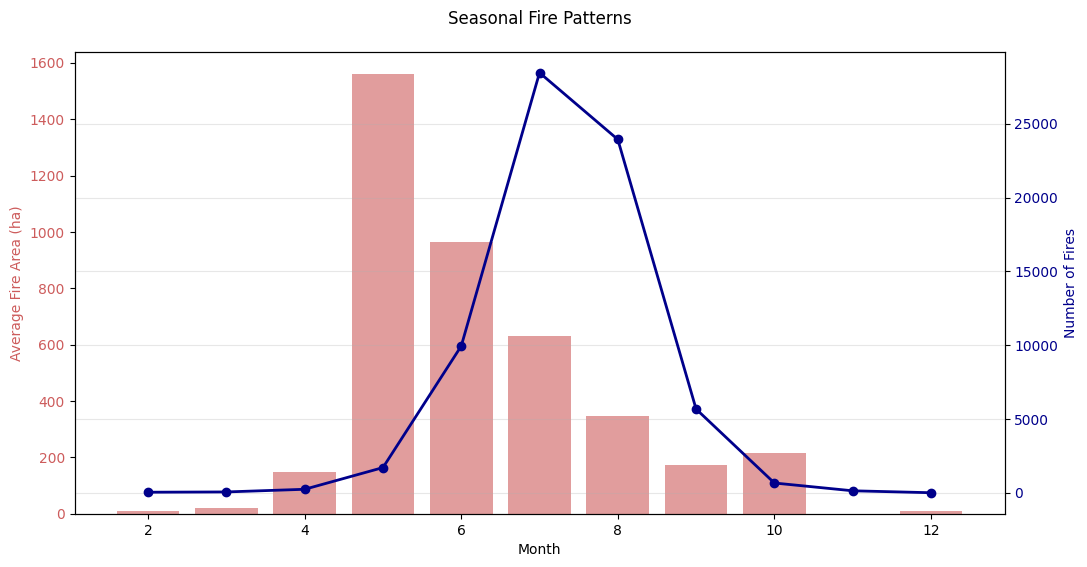

In [9]:
df = load_and_preprocess_data("Datos/Firegrowth_groups_v1_01.csv")
    

# Create visualizations
plot_seasonal_patterns(df)


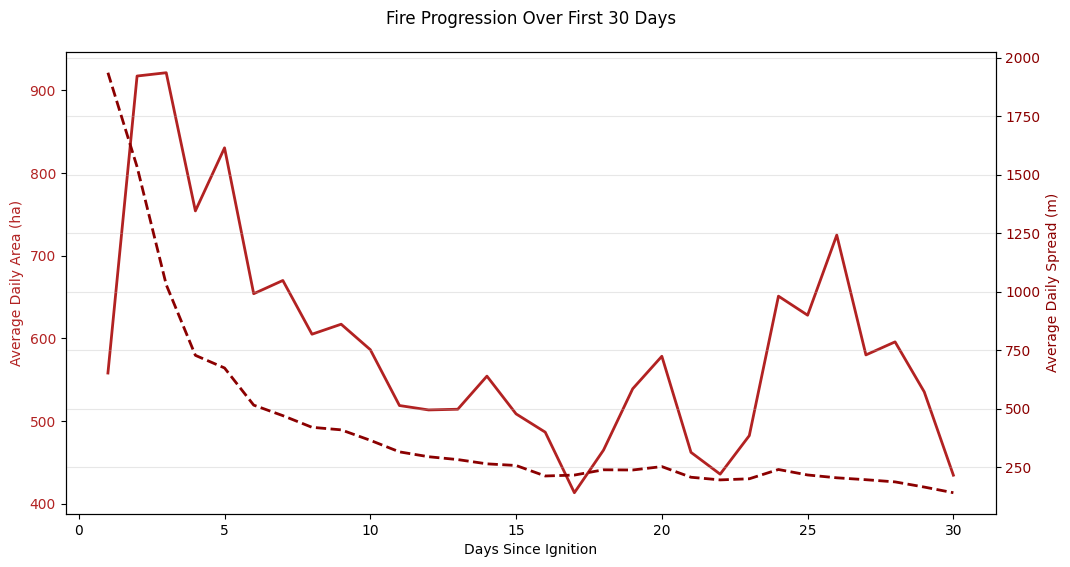

In [10]:
plot_fire_progression(df)


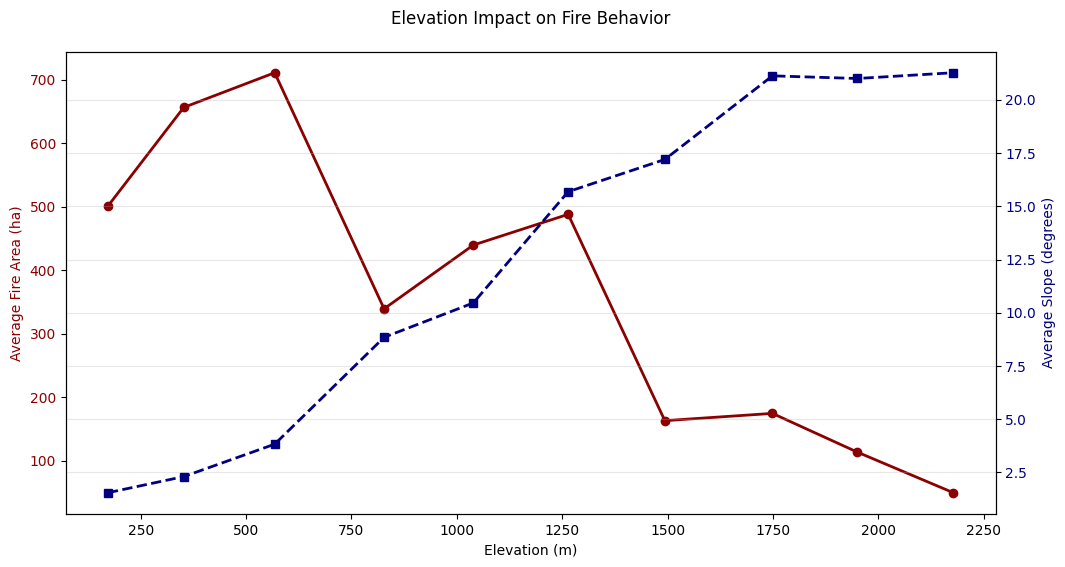

In [11]:
plot_elevation_impact(df)

/tmp/ipykernel_11003/2131069422.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conifer_stats = df.groupby('conifer_bin').agg({


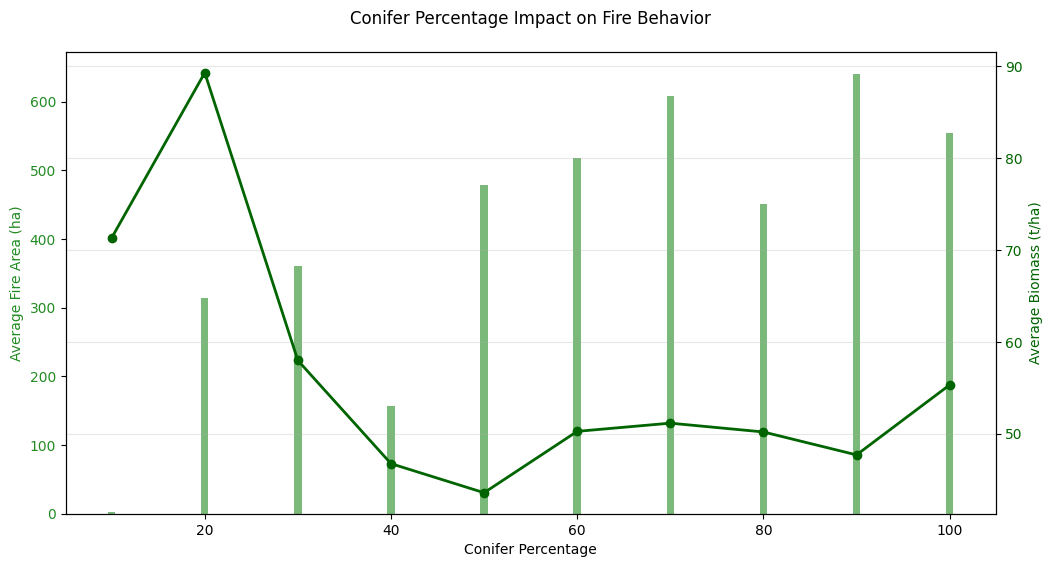

In [12]:
plot_conifer_impact(df)